# Convergence plots

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
V = [ 0.65826859 -0.21697946 -0.22061783 -0.2206713  -0.22

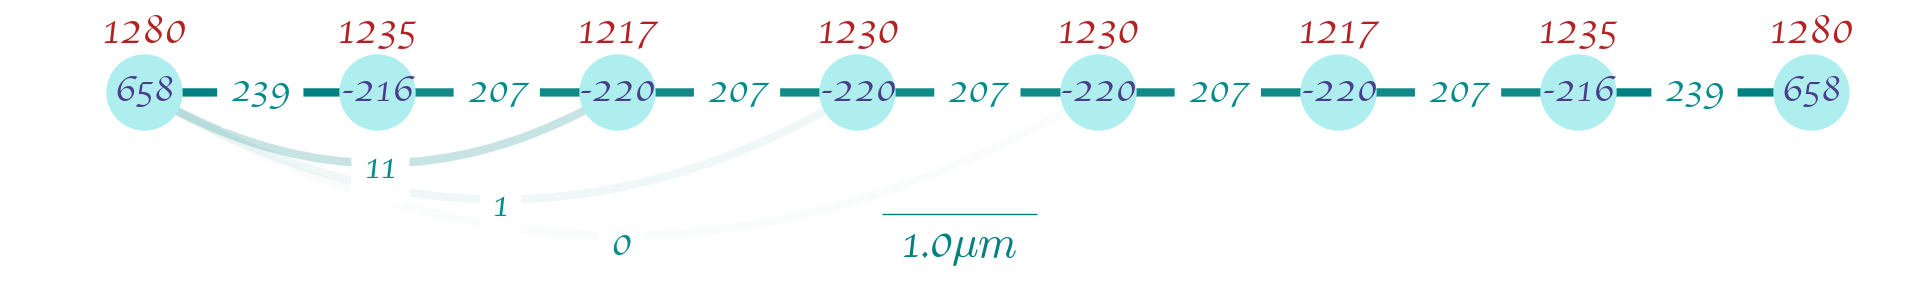

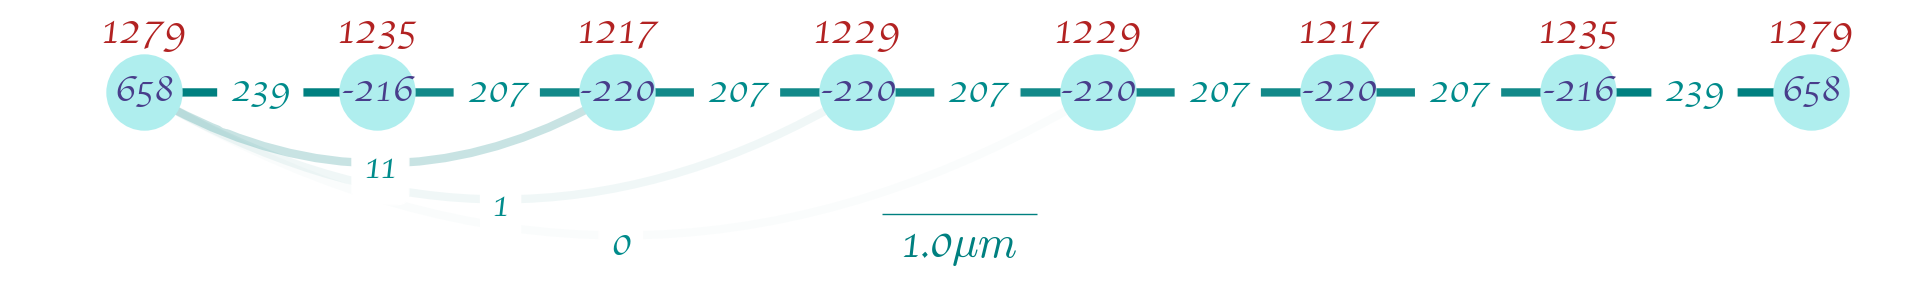

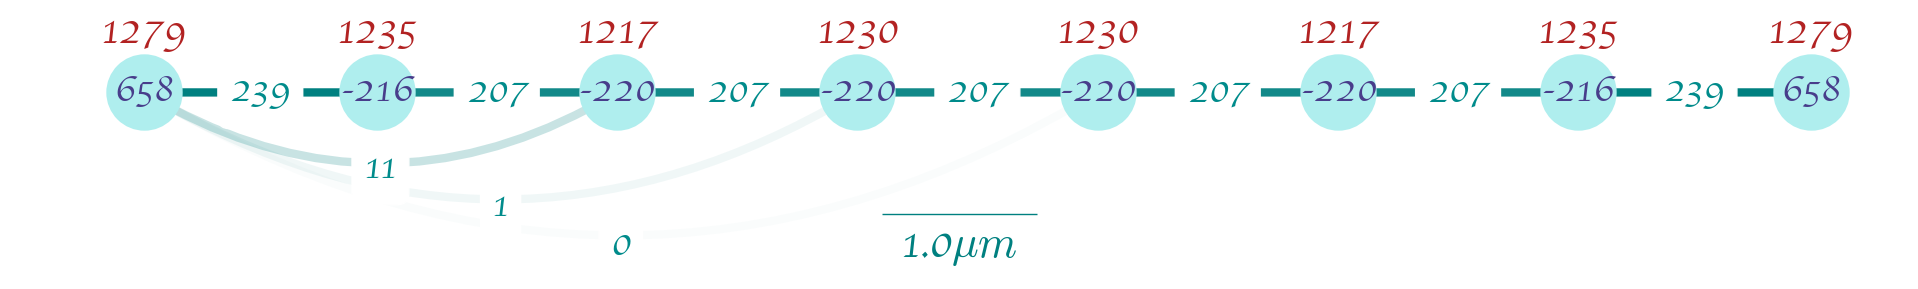

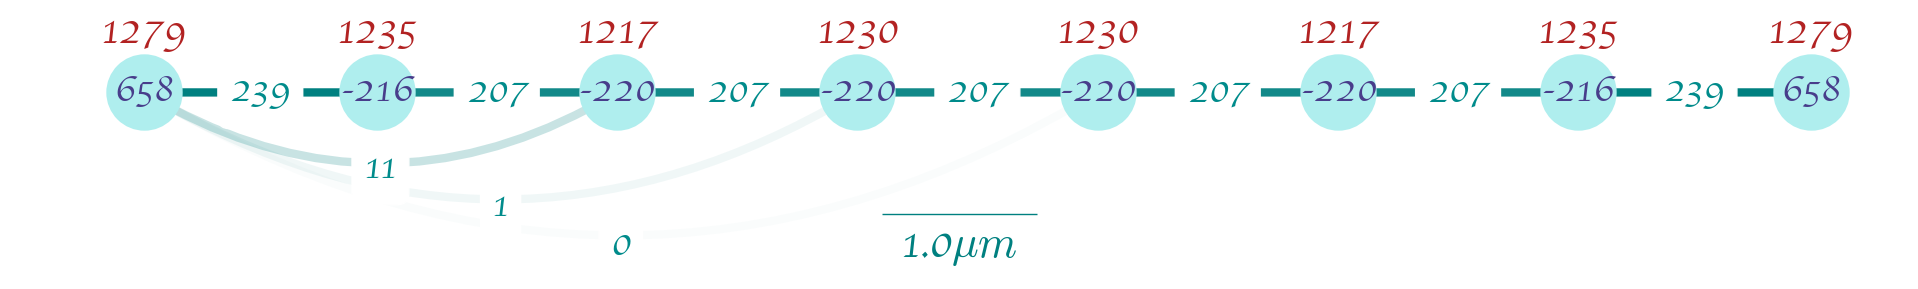

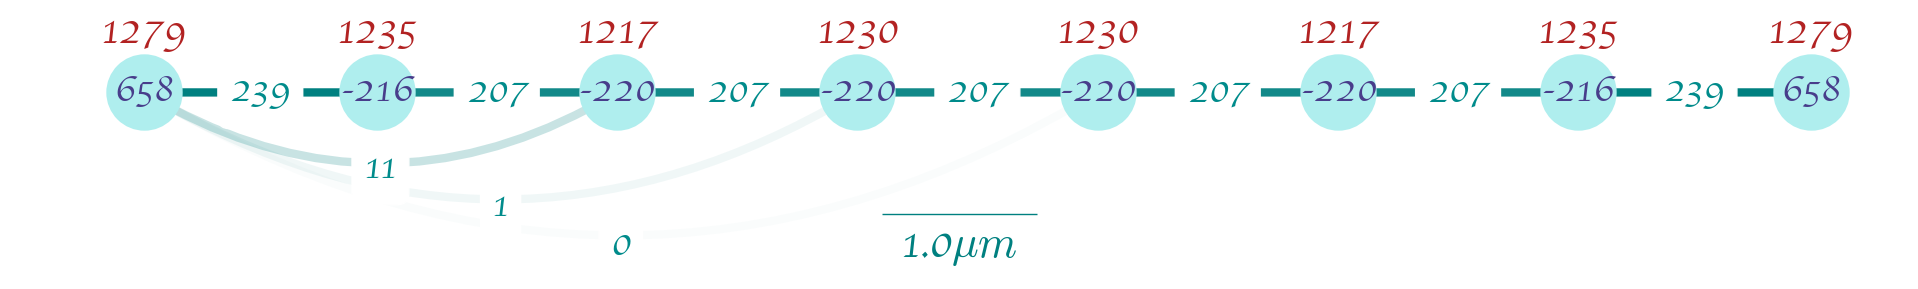

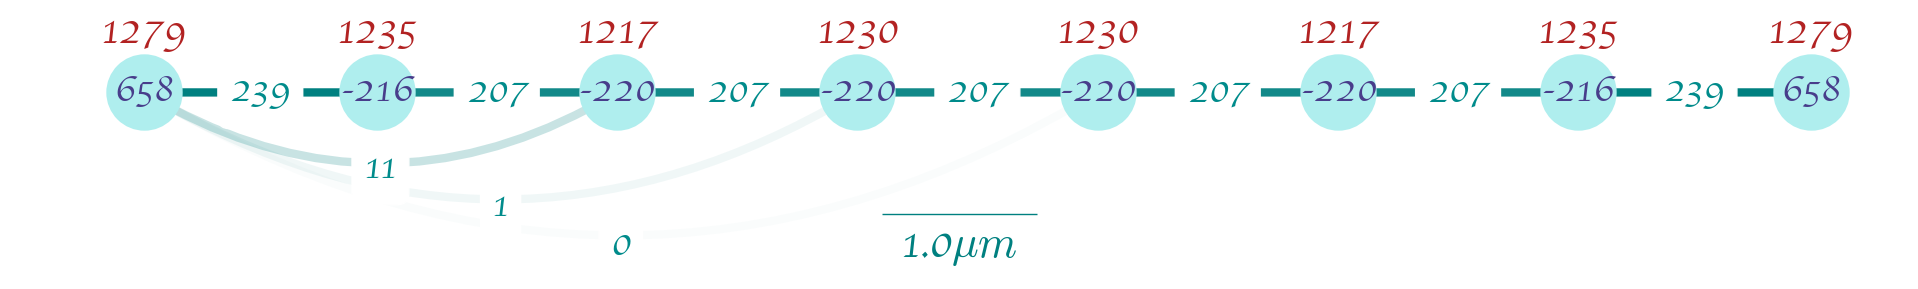

In [3]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *


L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = ""
R0 = np.array([3, 3, 7.2])
A_list = []
U_list = []
for N in range(12, 24, 2):
    G = HubbardGraph(
        N,
        R0=R0,
        lattice=np.array([L, Ly], dtype=int),
        trap=(52.26, 1000),
        lc=(1550, 1600),
        ascatt=1770,
        laser=780,
        band=1,
        dim=d,
        sparse=True,
        shape=shape,
        equalize=False,
        verbosity=0,
    )

    fn = f"../output/convergence/{d}D_{L}x1_{shape}_{w}_N_{N}.ini"
    report = rep.get_report(fn)
    G = read_file(report, G)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
    A_list.append(G.A)
    U_list.append(G.U)
print(f"V = {np.diag(G.A)}")
t = abs(G.nn_tunneling(G.A))
print(f"t = {t}")
print(f"U = {G.U}")
print(f"V_err = {G.v_cost_func(G.A, None)}")
print(f"t_err = {G.t_cost_func(G.A, None, None, None)}")
print(f"U_err = {G.u_cost_func(G.U, None)}")


max_err A = 0.00021897073218026948, max_err U = 0.00056988107091475 max_err = 0.00056988107091475
max_err A = 4.692465391718098e-06, max_err U = 5.918703765877736e-05 max_err = 5.918703765877736e-05
max_err A = 1.1283349347799116e-07, max_err U = 1.2310956441863042e-05 max_err = 1.2310956441863042e-05
max_err A = 2.7422235219772223e-09, max_err U = 1.543257671246894e-06 max_err = 1.543257671246894e-06
max_err A = 3.858896386143e-11, max_err U = 1.4504445710511573e-07 max_err = 1.4504445710511573e-07
max_err A = 0.0, max_err U = 0.0 max_err = 0.0


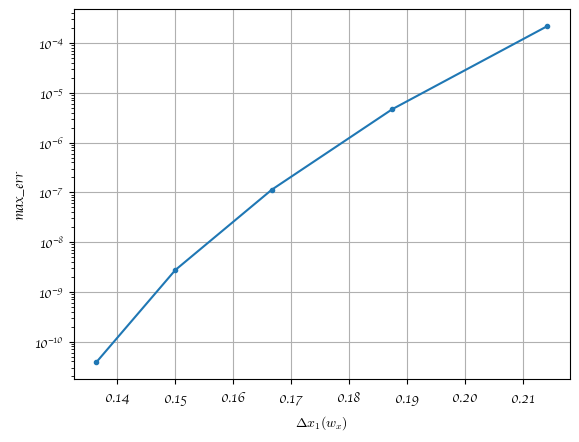

In [4]:
import matplotlib.pyplot as plt

dx = 3 / np.arange(12, 24, 2)[::-1]
max_err = np.zeros_like(dx)
for i in range(len(max_err)):
    mea = np.max(abs(A_list[i] - A_list[-1])) / abs(A_list[-1].max())
    meu = np.max(abs(U_list[i] - U_list[-1])) / abs(U_list[-1].max())
    me = max(mea, meu)
    print(f"max_err A = {mea}, max_err U = {meu} max_err = {me}")
    max_err[i] = mea
plt.plot(dx[:-1], max_err[:-1][::-1], ".-")
plt.xlabel("$\Delta x_1(w_x)$")
plt.ylabel("max_err")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig1.pdf")


Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
V = [ 0.65826859 -0.21697946 -0.22061783 -0.2206713  -0.22

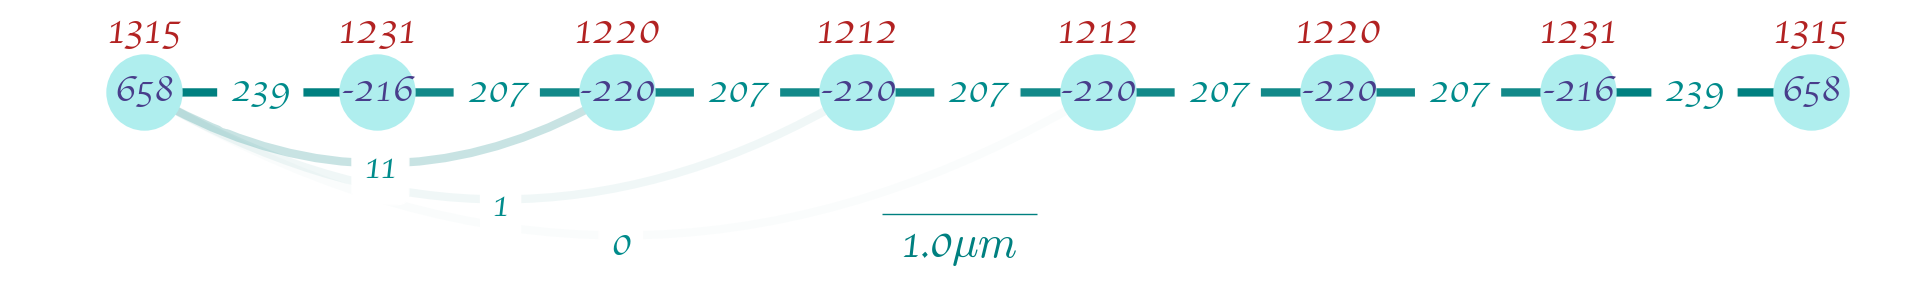

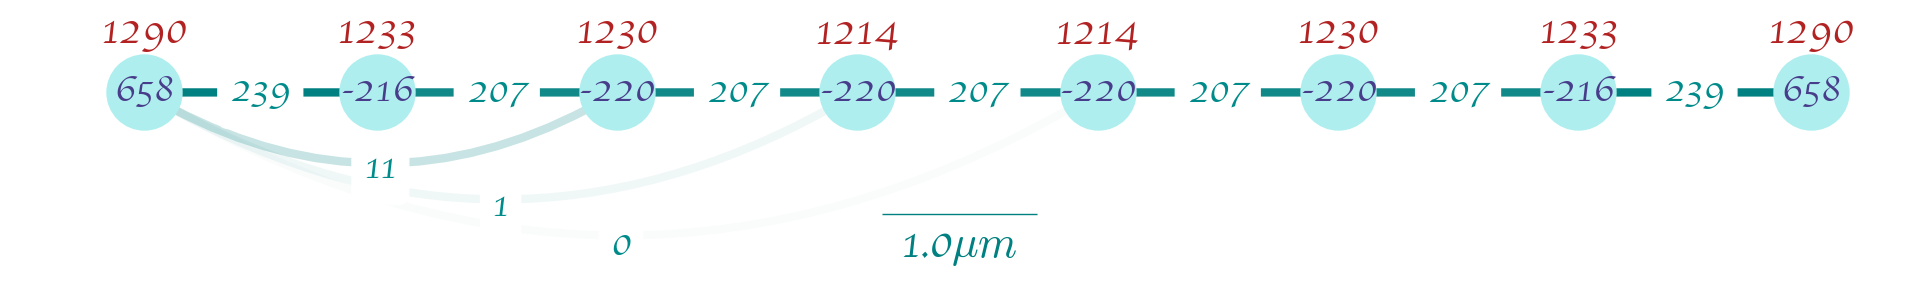

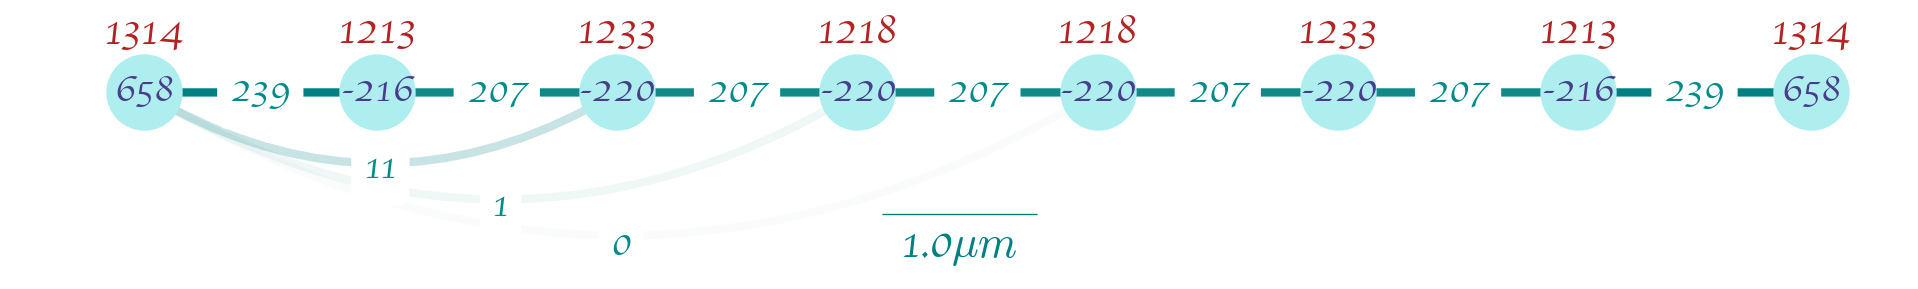

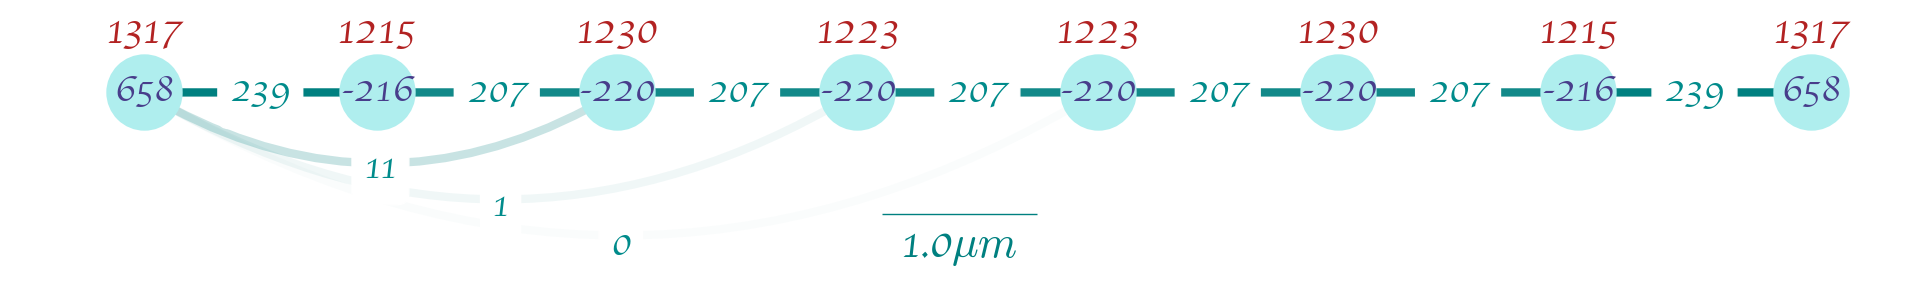

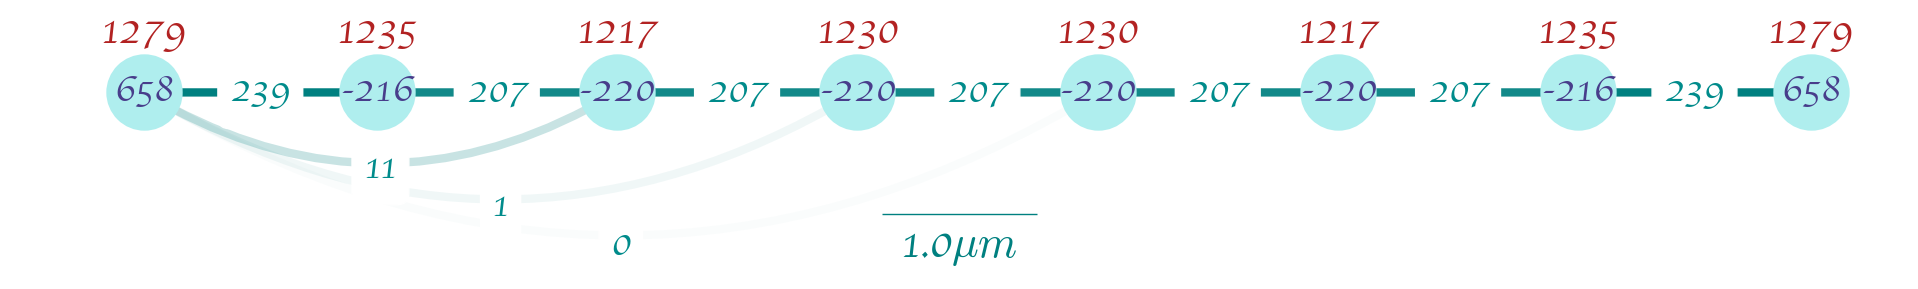

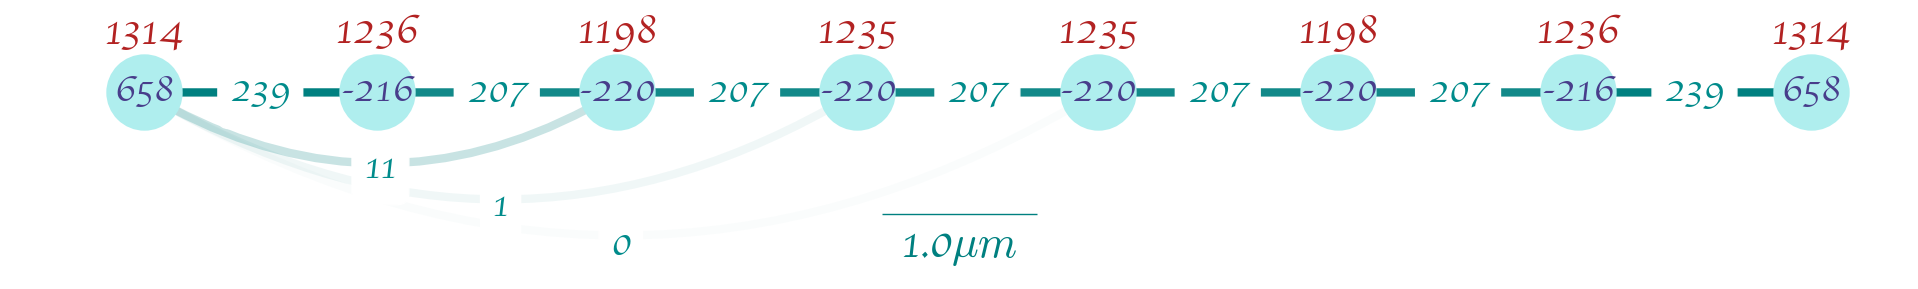

In [9]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = ""
A_list = []
U_list = []
for N in range(12, 24, 2):
    R0 = np.array([1, 1, 2.4]) * N * 3 / 20
    G = HubbardGraph(
        N,
        R0=R0,
        lattice=np.array([L, Ly], dtype=int),
        trap=(52.26, 1000),
        lc=(1550, 1600),
        ascatt=1770,
        laser=780,
        band=1,
        dim=d,
        sparse=True,
        shape=shape,
        equalize=False,
        verbosity=0,
    )

    fn = f"../output/convergence/{d}D_{L}x1_{shape}_{w}_L_{N}.ini"
    report = rep.get_report(fn)
    G = read_file(report, G)
    G.draw_graph(nnn=True, A=G.A, U=G.U)
    A_list.append(G.A)
    U_list.append(G.U)
print(f"V = {np.diag(G.A)}")
t = abs(G.nn_tunneling(G.A))
print(f"t = {t}")
print(f"U = {G.U}")
print(f"V_err = {G.v_cost_func(G.A, None)}")
print(f"t_err = {G.t_cost_func(G.A, None, None, None)}")
print(f"U_err = {G.u_cost_func(G.U, None)}")


max_err A = 6.041274458750033e-08, max_err U = 0.017209502411957907 max_err = 0.017209502411957907
max_err A = 1.2217319929303136e-09, max_err U = 0.024188259063103987 max_err = 0.024188259063103987
max_err A = 2.4297554588383056e-11, max_err U = 0.026166919271700364 max_err = 0.026166919271700364
max_err A = 3.87002919234653e-13, max_err U = 0.02395645612697833 max_err = 0.02395645612697833
max_err A = 4.106966344181831e-13, max_err U = 0.02632758176757165 max_err = 0.02632758176757165
max_err A = 0.0, max_err U = 0.0 max_err = 0.0


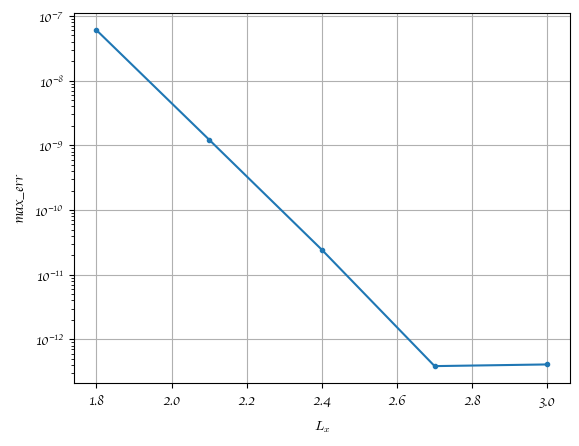

In [10]:
import matplotlib.pyplot as plt

r = np.arange(12, 24, 2)
max_err = np.arange(12, 24, 2, dtype=float)
for i in range(len(max_err)):
    mea = np.max(abs(A_list[i] - A_list[-1])) / abs(A_list[-1].max())
    meu = np.max(abs(U_list[i] - U_list[-1])) / abs(U_list[-1].max())
    me = max(mea, meu)
    print(f"max_err A = {mea}, max_err U = {meu} max_err = {me}")
    max_err[i] = mea
plt.plot(r[:-1] * 3 / 20, max_err[:-1], '.-')
plt.xlabel("$L_x$")
plt.ylabel("max_err")
plt.yscale("log")
plt.grid()
plt.savefig("AppFig2.pdf")
